In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# 1. Load Data
rfm = pd.read_csv('../data/processed/rfm_table.csv')

In [3]:
# 2. Preprocessing (The "Squashing" Step)
# We use Log transformation because Monetary/Frequency are skewed
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p, axis = 1)

In [4]:
# 3. Scaling (The "Normalization" Step)
# K-Means cares about distance. 
# Recency (0-700) is much bigger than Frequency (1-15). We must scale them to 0-1 range.
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

In [5]:
# 4. Finding "K" (The Elbow Method)
# We test 1 to 10 clusters to see where the error drops the most
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

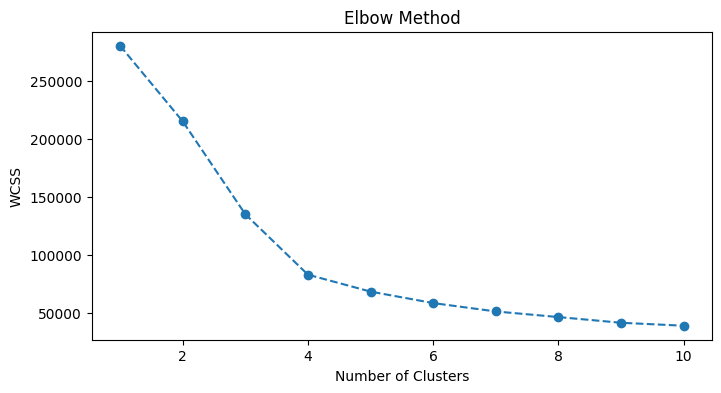

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# 5. The Model (Running K=4)
# Based on typical e-commerce data, 4 is usually the sweet spot.
k = 4
model = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = model.fit_predict(rfm_scaled)

In [8]:
# 6. Assign Clusters back to original data
rfm['Cluster'] = clusters

In [9]:
# 7. Interpret the Clusters (The "DNA" Check)
# We group by Cluster to see who they are.
summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customer_unique_id': 'count'
}).sort_values(by='Monetary', ascending=False)

In [10]:
print("\nCluster Profiles (Who is who?):")
print(summary)


Cluster Profiles (Who is who?):
            Recency  Frequency    Monetary  customer_unique_id
Cluster                                                       
2        220.294538   2.113888  308.528190                2801
0        272.161449   1.000000  296.733223               32041
1         42.202317   1.000000  133.184483               16143
3        287.804168   1.000000   68.391664               42373


In [12]:

rfm.to_csv('../data/processed/rfm_with_clusters.csv', index=False)
print("Saved Clustered Data to 'data/processed/rfm_with_clusters.csv'")

Saved Clustered Data to 'data/processed/rfm_with_clusters.csv'
